this is the wrong version. have a look at `nb2`. thanks!

The mistake i made: the data was not normally distributed, so parametric test was a bad idea!

# FIFA WC Goal Scoring Trends

![A soccer pitch for an international match.](soccer-pitch.jpg)

In FIFA World Cup, men and women teams participate for the prestigious title every 4 years. As the general assumption would be momre goals are scored in the men's matches, but what if that more goals are scored in women's international football matches than men's. This would make an interesting investigation. It requires to perform a valid statistical hypothesis test to be sure!

Acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so let's limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

Two datasets containing the results of every official men's and women's international football match since the 19th century, which was collected from `DataCamp`. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question we are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

Let's assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

## importing libraries

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt
import pingouin


## importing dataset

In [2]:
m_df = pd.read_csv('men_results.csv', index_col=0, parse_dates=['date'])
f_df = pd.read_csv('women_results.csv', index_col=0, parse_dates=['date'])

In [3]:
m_df.head()

,date,home_team,away_team,home_score,away_score,tournament
0,1872-11-30,Scotland,England,0,0,Friendly
1,1873-03-08,England,Scotland,4,2,Friendly
2,1874-03-07,Scotland,England,2,1,Friendly
3,1875-03-06,England,Scotland,2,2,Friendly
4,1876-03-04,Scotland,England,3,0,Friendly


In [4]:
f_df.head()

,date,home_team,away_team,home_score,away_score,tournament
0,1969-11-01,Italy,France,1,0,Euro
1,1969-11-01,Denmark,England,4,3,Euro
2,1969-11-02,England,France,2,0,Euro
3,1969-11-02,Italy,Denmark,3,1,Euro
4,1975-08-25,Thailand,Australia,3,2,AFC Championship


In [5]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44353 entries, 0 to 44352
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        44353 non-null  datetime64[ns]
 1   home_team   44353 non-null  object        
 2   away_team   44353 non-null  object        
 3   home_score  44353 non-null  int64         
 4   away_score  44353 non-null  int64         
 5   tournament  44353 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 2.4+ MB


In [6]:
f_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4884 entries, 0 to 4883
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        4884 non-null   datetime64[ns]
 1   home_team   4884 non-null   object        
 2   away_team   4884 non-null   object        
 3   home_score  4884 non-null   int64         
 4   away_score  4884 non-null   int64         
 5   tournament  4884 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 267.1+ KB


In [7]:
m_df = m_df[(m_df['tournament'] == 'FIFA World Cup') & (m_df['date'] >= '2002-01-01')]
f_df = f_df[(f_df['tournament'] == 'FIFA World Cup') & (f_df['date'] >= '2002-01-01')]

In [8]:
m_df.loc[:, 'total_score'] = m_df['home_score'] + m_df['away_score']
f_df.loc[:, 'total_score'] = f_df['home_score'] + f_df['away_score']

In [9]:
size_m = len(m_df)
size_f = len(f_df)

print(f'men matches: {size_m}')
print(f'women matches: {size_f}')

men matches: 384
women matches: 200


In [10]:
mu_m = m_df['total_score'].mean()
mu_f = f_df['total_score'].mean()

print(mu_m, mu_f)

2.5130208333333335 2.98


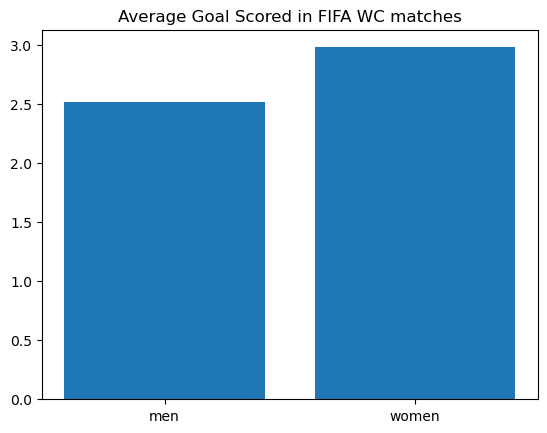

In [11]:
plt.bar(height=[mu_m, mu_f], x=['men', 'women'])
plt.title('Average Goal Scored in FIFA WC matches')
plt.show()

the sample average says, more goals are scored in women's matches than in men's. But is the difference significantly bigger? To find out: we must run a hypothesis test to find out the statistical significance of the difference in means.

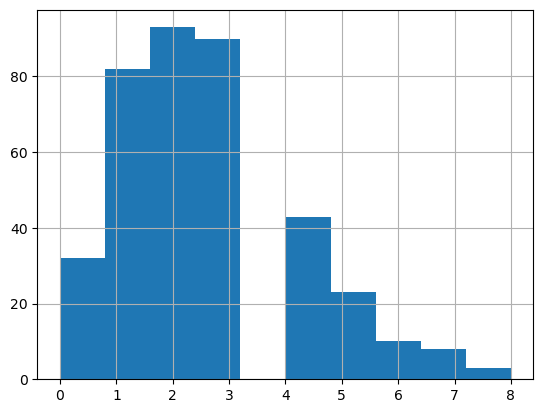

In [12]:
m_df['total_score'].hist()
plt.show()

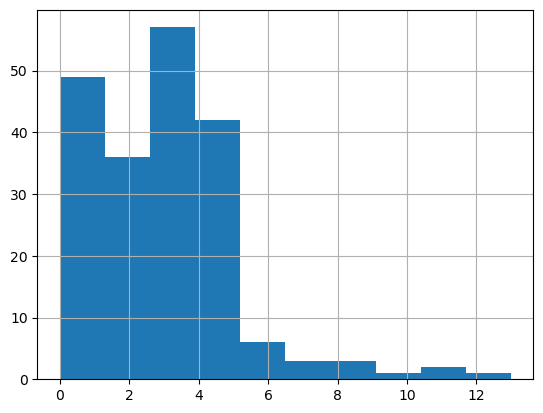

In [13]:
f_df['total_score'].hist()
plt.show()

The distributions are not normal. So we perform a right-tailed `wilcoxon-mann-whitney` test

In [19]:
from scipy.stats import mannwhitneyu

result_scipy = mannwhitneyu(x=f_df['total_score'], y=m_df['total_score'], alternative='greater')

result_scipy

MannwhitneyuResult(statistic=43273.0, pvalue=0.005106609825443641)

In [22]:
p_val = result_scipy[1]
p_val

0.005106609825443641

## t test

to compare the mean goals scored of by men and women: let's perform a `t-test`. 
- They are `unpaired` 
- and the observations are `independent` in nature
- We would be performing a `right tailed` test

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

so,

$H_0$ : $µ_m$ = $µ_f$ or, $µ_f$ - $µ_m$ = 0

$H_A$ : $µ_f$ - $µ_m$ > 0


### t test statistics

$µ_f$ - $µ_m$ is the `test statistics` here.

`t` = (diff in sample stats - diff in population parameters)/SE

- Assuming $H_0$ is true, `diff in population parameters` = `0`
- standard error, `SE` = root over($s^2_f$/$n_f$ + $s^2_f$/$n_m$)

so, 
> `t` = ($µ_f$ - $µ_m$)/SE

where, `s` is the standard deviation of the variable and `n` is the sample size

### calculating t_stat and p_val

In [25]:
s_m = m_df['total_score'].std()
s_f = f_df['total_score'].std()

denominator = np.sqrt((s_f ** 2 / size_f) + (s_m ** 2 / size_m))
numerator = mu_f - mu_m
t_stat = numerator/denominator
t_stat

2.81282275962073

In [15]:
alpha = .1 # 10%
dof = size_m + size_f - 2

p_val = 1 - t.cdf(t_stat, df=dof) # right tailed

In [16]:
print(f'''
T: {t_stat}
dof: {dof}
p_val: {p_val}
      ''')


T: 2.81282275962073
dof: 582
p_val: 0.0025383186141713088
      


### issue

In [17]:
pingouin.ttest(x=f_df['total_score'], y=m_df['total_score'], paired=False, alternative='greater')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.812823,340.102801,greater,0.002598,"[0.19, inf]",0.261228,8.927,0.911063


we ran the t-test with pingouin to check if my calculation is right or not and the t_stat and p_val matches. However, dof is not matching.

Can anybody help me out with the `issue`?

### result of the t-test

In [18]:
p_val <= alpha

True

As the `p_val` is less than `alpha`. So, we should reject the $H_0$ in favor of the $H_A$. Meaning, The mean number of goals scored in women's international soccer matches is greater than men's.